In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  24-11-2023     CUST001    Male   34           Beauty   
1               2  27-02-2023     CUST002  Female   26         Clothing   
2               3  13-01-2023     CUST003    Male   50      Electronics   
3               4  21-05-2023     CUST004    Male   37         Clothing   
4               5  06-05-2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [ ]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


## **Descriptive Statistics**

In [ ]:
desc_stats = df[['Age', 'Price per Unit', 'Quantity', 'Total Amount']].describe()
print(desc_stats)

              Age  Price per Unit     Quantity  Total Amount
count  1000.00000     1000.000000  1000.000000   1000.000000
mean     41.39200      179.890000     2.514000    456.000000
std      13.68143      189.681356     1.132734    559.997632
min      18.00000       25.000000     1.000000     25.000000
25%      29.00000       30.000000     1.000000     60.000000
50%      42.00000       50.000000     3.000000    135.000000
75%      53.00000      300.000000     4.000000    900.000000
max      64.00000      500.000000     4.000000   2000.000000


In [ ]:
print(df['Gender'].mode()[0])
print(df['Product Category'].mode()[0])

Female
Clothing


In [ ]:
std_dev = df[['Age', 'Price per Unit', 'Quantity', 'Total Amount']].std()
print(std_dev)

Age                13.681430
Price per Unit    189.681356
Quantity            1.132734
Total Amount      559.997632
dtype: float64


## **Time Series Analysis (Sales Trends Over Time)**

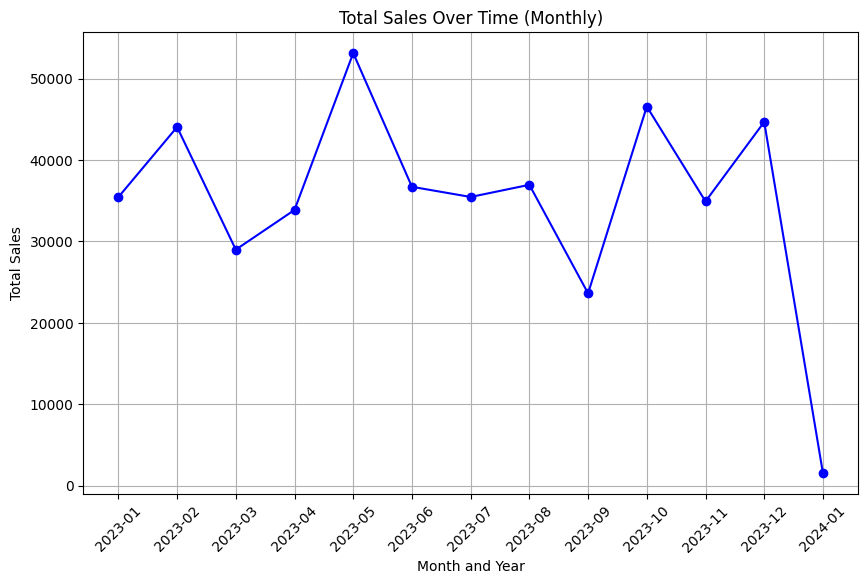

In [ ]:
# Ensure 'date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from 'date' column
df['year_month'] = df['Date'].dt.to_period('M')

# Group the data by 'year_month' and calculate total sales per month
sales_trends_monthly = df.groupby('year_month')['Total Amount'].sum()

# Plot the time series (sales over month and year)
plt.figure(figsize=(10, 6))
plt.plot(sales_trends_monthly.index.astype(str), sales_trends_monthly.values, color='blue', marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


## **Customer and Product Analysis**

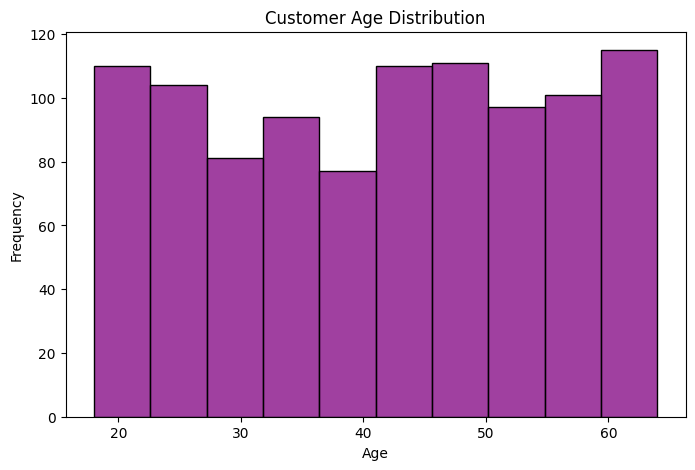

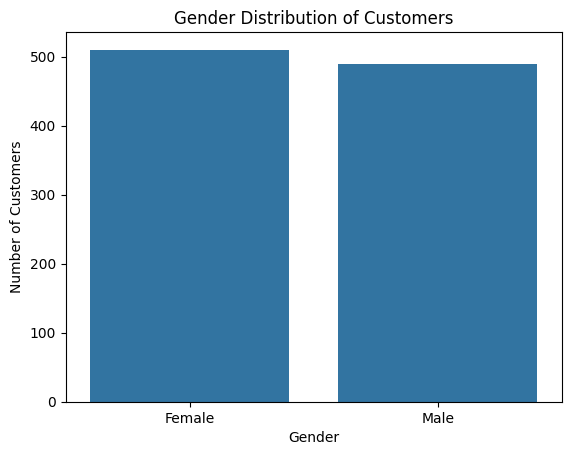

In [ ]:
# Analyzing the age distribution of customers
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, color='purple')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
gender_dist = df['Gender'].value_counts()
sns.barplot(x=gender_dist.index, y=gender_dist.values)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-20-5d8cda7993e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_count.index, y=product_category_count.values, palette='viridis')


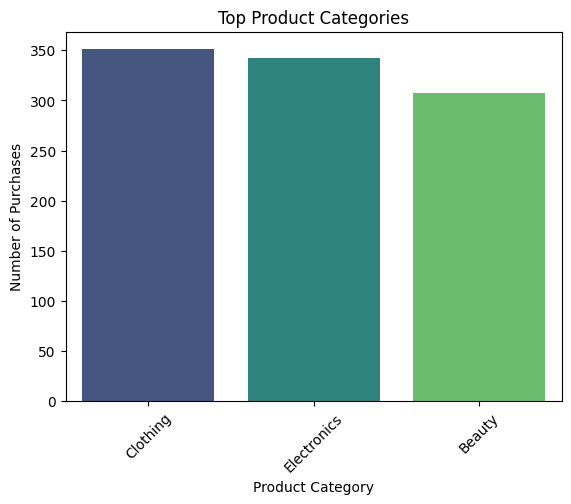

<ipython-input-20-5d8cda7993e7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='plasma')


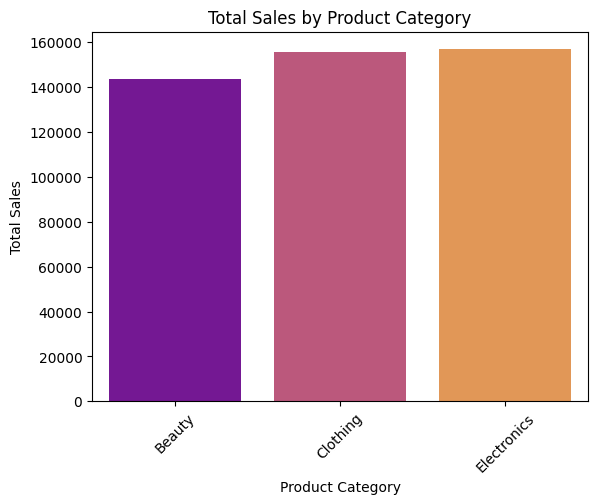

In [ ]:
# Most popular product categories
product_category_count = df['Product Category'].value_counts()
sns.barplot(x=product_category_count.index, y=product_category_count.values, palette='viridis')
plt.title('Top Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

# Total sales by product category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum()
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='plasma')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


## **Visualization**

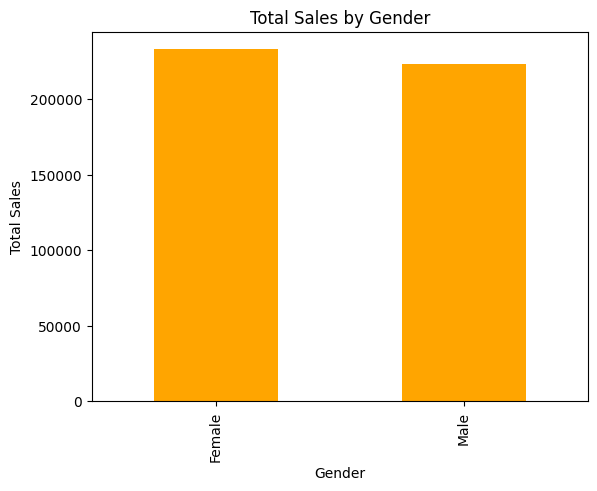

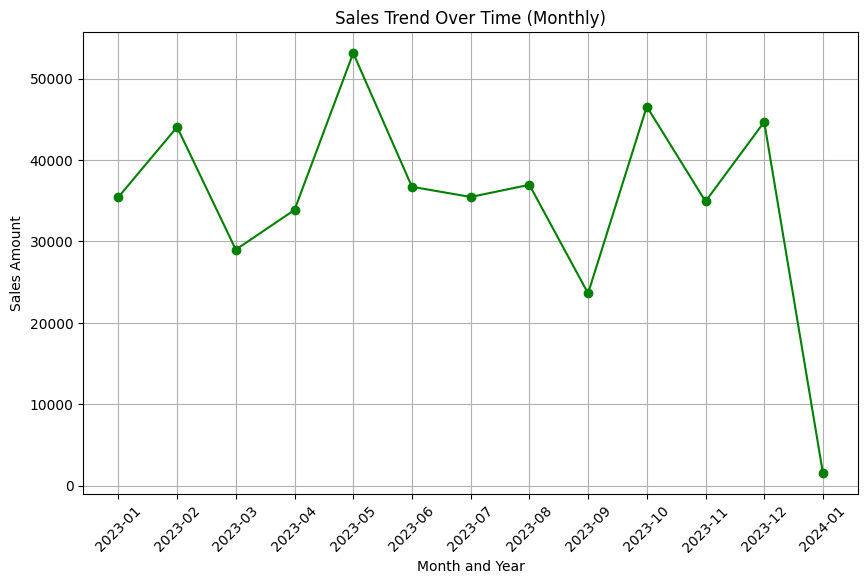

In [ ]:
# Bar chart for total sales by customer gender
sales_by_gender = df.groupby('Gender')['Total Amount'].sum()
sales_by_gender.plot(kind='bar', color='orange')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

# Ensure 'date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract only month and year from 'date' column
df['year_month'] = df['Date'].dt.to_period('M')

# Group the data by 'year_month' and calculate total sales per month
sales_trends_monthly = df.groupby('year_month')['Total Amount'].sum()

# Plot the time series (sales trend over month and year)
plt.figure(figsize=(10, 6))
plt.plot(sales_trends_monthly.index.astype(str), sales_trends_monthly.values, marker='o', color='green')
plt.title('Sales Trend Over Time (Monthly)')
plt.xlabel('Month and Year')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()



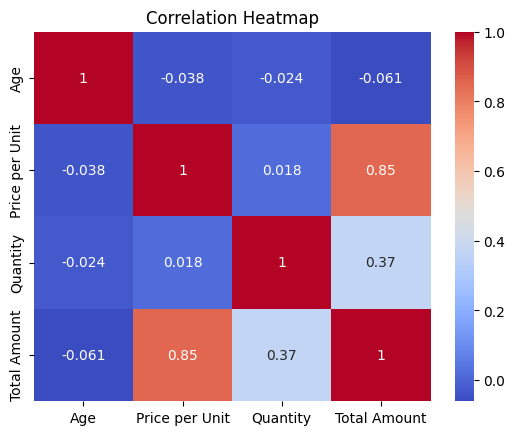

In [ ]:
# Correlation matrix heatmap
corr = df[['Age', 'Price per Unit', 'Quantity', 'Total Amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## **Recommendations**
Based on the EDA
Key Findings:

**Product Category Performance:**

*   **Beauty** is the top-selling category in terms of mean, median, and mode, indicating consistent sales across different metrics.
*   **Clothing** has the highest sales volume (sum of quantity), suggesting it's the most popular category overall.
*   **Electronics** has a relatively high mean sales value, indicating it might be priced higher or sold in fewer quantities compared to the other categories.

**Gender Distribution:**

**Female** customers are slightly more dominant than Male customers in terms of both sales volume and customer count.
This suggests tailoring marketing efforts towards female customers might be beneficial.

**Age Group Analysis:**

The 26-35 age group appears to be the most active in terms of both customer count and sales volume.
This suggests targeting marketing campaigns towards this age group could be effective.

**Sales Trends:**

Seasonal trends are evident in the total sales by month and year chart. Sales tend to increase during specific months (e.g., December, possibly due to holiday shopping).
This suggests aligning marketing and inventory strategies with seasonal trends could improve sales.




## **Recommendations:**

**Optimize Product Stocking:**

Prioritize stocking Beauty and Clothing products, as they consistently demonstrate strong sales performance.
Monitor stock levels closely to avoid stockouts and lost sales.
Consider reducing stock levels for Electronics if they are not selling as quickly.

**Customer Targeting:**

Tailor marketing campaigns towards **female customers and the 26-35 age **group, as they are the most active segments.
Offer personalized promotions based on customer purchase history and preferences.

**Implement Loyalty Programs:**

Create a loyalty program to reward repeat customers and encourage them to make additional purchases.
Offer exclusive discounts, early access to sales, and personalized recommendations to enhance customer satisfaction.

**Leverage Sales Trends:**

Increase marketing efforts during peak sales periods to capitalize on consumer demand.
Adjust inventory levels to anticipate seasonal fluctuations in sales.

**Price Sensitivity Analysis:**

Evaluate the pricing strategy for Electronics to determine if it's affecting sales.
Consider offering discounts or promotions on Electronics to increase sales volume.
Explore bundling opportunities to increase the perceived value of Electronics products.

